In [1]:
!python --version

Python 3.10.14


```text
matplotlib                3.8.0
pandas                    1.5.3
scipy                     1.11.1
seaborn                   0.11.2
statannotations           0.6.0
```

In [2]:
from itertools import combinations

from matplotlib.patches import ConnectionPatch
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import seaborn as sns
from statannotations.Annotator import Annotator

In [3]:
df = pd.read_csv('data.csv')
df

,Model,Acceleration Rate,SSIM
0,Zero Filling,1x,1.000000
1,Zero Filling,2x,0.962146
2,Zero Filling,2x,0.961288
3,Zero Filling,2x,0.961364
4,Zero Filling,2x,0.960823
...,...,...,...
1532,AFT-Net (KI),16x,0.926393
1533,AFT-Net (KI),16x,0.897611
1534,AFT-Net (KI),16x,0.897349
1535,AFT-Net (KI),16x,0.898450


In [4]:
plt.rcdefaults()
custom_rcParams = {
    'axes.linewidth': 1.6,
    'font.family': ['Arial'],
    'font.size': 20,
    'legend.fontsize': 18,
    'lines.linewidth': 1.5
}
for k, v in custom_rcParams.items():
    print(f'{k:>16s}: {str(plt.rcParams[k]):>16s} -> {str(v):>16s}')
plt.rcParams.update(custom_rcParams)

  axes.linewidth:              0.8 ->              1.6
     font.family:   ['sans-serif'] ->        ['Arial']
       font.size:             10.0 ->               20
 legend.fontsize:           medium ->               18
 lines.linewidth:              1.5 ->              1.5


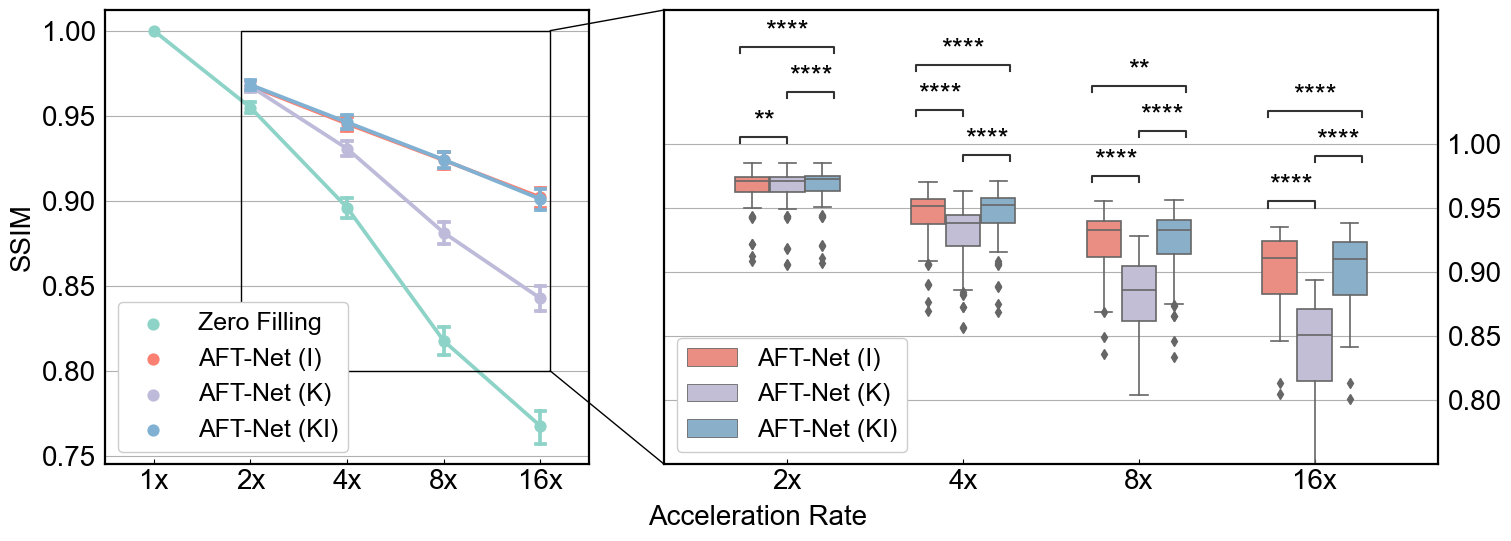

In [5]:

fig, axs = plt.subplots(1, 2, figsize=(14, 5), width_ratios=[5, 8])
fig.tight_layout(pad=0)

palette = {
    'Zero Filling': plt.cm.Set3(0),
    'AFT-Net (I)': plt.cm.Set3(3),
    'AFT-Net (K)': plt.cm.Set3(2),
    'AFT-Net (KI)': plt.cm.Set3(4)
}

sns.pointplot(
    data=df,
    x='Acceleration Rate',
    y='SSIM',
    hue='Model',
    order=['1x', '2x', '4x', '8x', '16x'],
    errorbar='sd',
    palette=palette,
    capsize=.1,
    ax=axs[0]
)
axs[0].get_legend().set_title('')
axs[0].grid(axis='y')
axs[0].legend(loc='lower left', framealpha=1)
axs[0].set_axisbelow(True)
axs[0].set_xlabel('')
axs[0].tick_params(left=False)
axs[0].tick_params(axis='x', direction='in')

data = df[df['Model'] != 'Zero Filling']
sns.boxplot(
    data=data,
    x='Acceleration Rate',
    y='SSIM',
    order=['2x', '4x', '8x', '16x'],
    hue='Model',
    palette=palette,
    width=0.6,
    linewidth=1.2,
    ax=axs[1],
    showfliers=True
)
axs[1].grid(axis='y')
axs[1].get_legend().set_title('')
axs[1].legend(loc='lower left', framealpha=1)
axs[1].set_axisbelow(True)
axs[1].set_xlabel('')
axs[1].set_yticks([.8, .85, .9, .95, 1.])
axs[1].set_ylabel('')
axs[1].set_ylim(.75, 1)
axs[1].tick_params(axis='x', direction='in')
axs[1].yaxis.tick_right()
axs[1].tick_params(right=False)

# add pvalue
pairs = list()
pvalues = list()
for acc in ['2x', '4x', '8x', '16x']:
    for model1, model2 in combinations(['AFT-Net (K)', 'AFT-Net (I)', 'AFT-Net (KI)'], 2):
        data1 = data[(data['Acceleration Rate'] == acc) & (
            data['Model'] == model1)]['SSIM'].to_list()
        data2 = data[(data['Acceleration Rate'] == acc) & (
            data['Model'] == model2)]['SSIM'].to_list()
        pvalues.append(stats.ttest_rel(data1, data2).pvalue)
        pairs.append(((acc, model1), (acc, model2)))
plotting_parameters = {'data': data, 'x': 'Acceleration Rate',
                       'y': 'SSIM', 'hue': 'Model', 'order': ['2x', '4x', '8x', '16x']}
annotator = Annotator(axs[1], pairs, verbose=False, **plotting_parameters)
annotator.set_pvalues(pvalues)
annotator.annotate()

# Rectangle
axs[0].add_patch(plt.Rectangle((.9, .8), 3.2, .2,
                 zorder=4, ec='black', fc='none', ls='-'))

# arrow
con = ConnectionPatch(
    xyA=(4.1, 1.), coordsA=axs[0].transData,
    xyB=(axs[1].get_xlim()[0], axs[1].get_ylim()[1]), coordsB=axs[1].transData,
    arrowstyle="-")
fig.add_artist(con)
con = ConnectionPatch(
    xyA=(4.1, .8), coordsA=axs[0].transData,
    xyB=(axs[1].get_xlim()[0], axs[1].get_ylim()[0]), coordsB=axs[1].transData,
    arrowstyle="-")
fig.add_artist(con)

# y label
fig.text(0.5, -0.05, 'Acceleration Rate', ha='center')

# save
fig.savefig('output.png', transparent=True,
            bbox_inches='tight', pad_inches=.1, dpi=200)